In [1]:
"""
Analyze daughter particles for annihilation event
author: Jiancheng Zeng
Date: July 12, 2023
"""

'\nAnalyze daughter particles for annihilation event\nauthor: Jiancheng Zeng\nDate: July 12, 2023\n'

In [2]:
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
#from toy_model_analysis import Analyze_trace, read_data_from_toymodel
import toy_model_analysis
import corner

In [3]:
# get particle ID
print(toy_model_analysis.particle_info())

             proton    deuteron     helium3  antiproton  antideuteron  \
particle ID    2212  1000010020  1000020030       -2212   -1000010020   
Z number          1           2           3           1             2   

             antihelium3  antineutron    pi-  electron  photon(gamma)  ...  \
particle ID  -1000020030        -2112 -211.0      11.0           22.0  ...   
Z number               3            1    NaN       NaN            NaN  ...   

               1000180371        Ar38        Ar39    1000180391        Ar40  \
particle ID  1.000180e+09  1000180380  1000180390  1.000180e+09  1000180400   
Z number              NaN          38          39           NaN          40   

                    K38         K39        Fe54        Fe56        Fe57  
particle ID  1000190380  1000190390  1000260540  1000260560  1000260570  
Z number             38          39          54          56          57  

[2 rows x 157 columns]


In [4]:
file_path_1 = '/home/jiancheng/GRAMS/toymodel_work/output/2023/anti_He3_daughters_all_1e7.dat'
label_50cm= '140cm width'

anti_He3_data_3d = toy_model_analysis.read_data_from_toymodel(file_path_1)
anti_He3_Result = toy_model_analysis.Analyze_daughter(anti_He3_data_3d, -1000010020, stop_event=True, in_flight_event=True)


Reading data...

Toy Model data imported
Found 15401 Events!
[##################################################] 100.00% 15401/15401
 We got 15401 events selected
Last event is 9999880


In [5]:
print(anti_He3_Result.get_value(0, 0))
print("\n")
# anti_He3_Result vector meaning: anti_He3_Result.get_value([event number][0 for general info/1 for daughter detailed info])
#print(anti_He3_Result.get_value(2, 1)[0])

[176, 5.3198, 147.4859998765365, 24.396829125665082, 7.697882, 6.99902, 8.31683]




[7190, 1312.52, 139.07433095830427, 11.231166628431794, 7.73439, 7.47092, 9.09625]


([<matplotlib.axis.XTick at 0x7fb8bd885570>,
 [Text(0, 0, '-211'),
  Text(1, 0, '11'),
  Text(2, 0, '22'),
  Text(3, 0, '111'),
  Text(4, 0, '211'),
  Text(5, 0, '2112'),
  Text(6, 0, '2212'),
  Text(7, 0, '1000010020'),
  Text(8, 0, '1000010030'),
  Text(9, 0, '1000130260')])

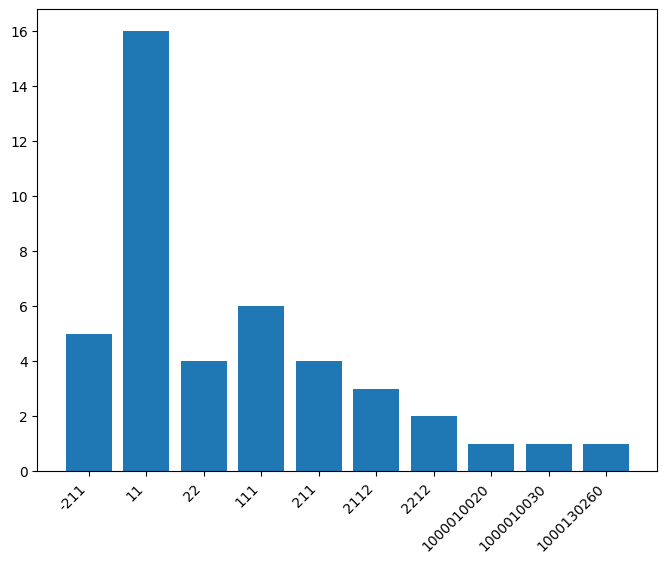

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

print(anti_He3_Result.get_value(10, 0))

# Count the occurrences of each unique element
unique_elements, element_counts = np.unique(anti_He3_Result.get_value(2, 1)[1], return_counts=True)

# Create an evenly spaced range of numbers for the x-axis
x_values = np.arange(len(unique_elements))

# Create the bar plot
plt.bar(x_values, element_counts)

# Set the x-ticks and labels
plt.xticks(x_values, unique_elements, rotation=45, ha='right')

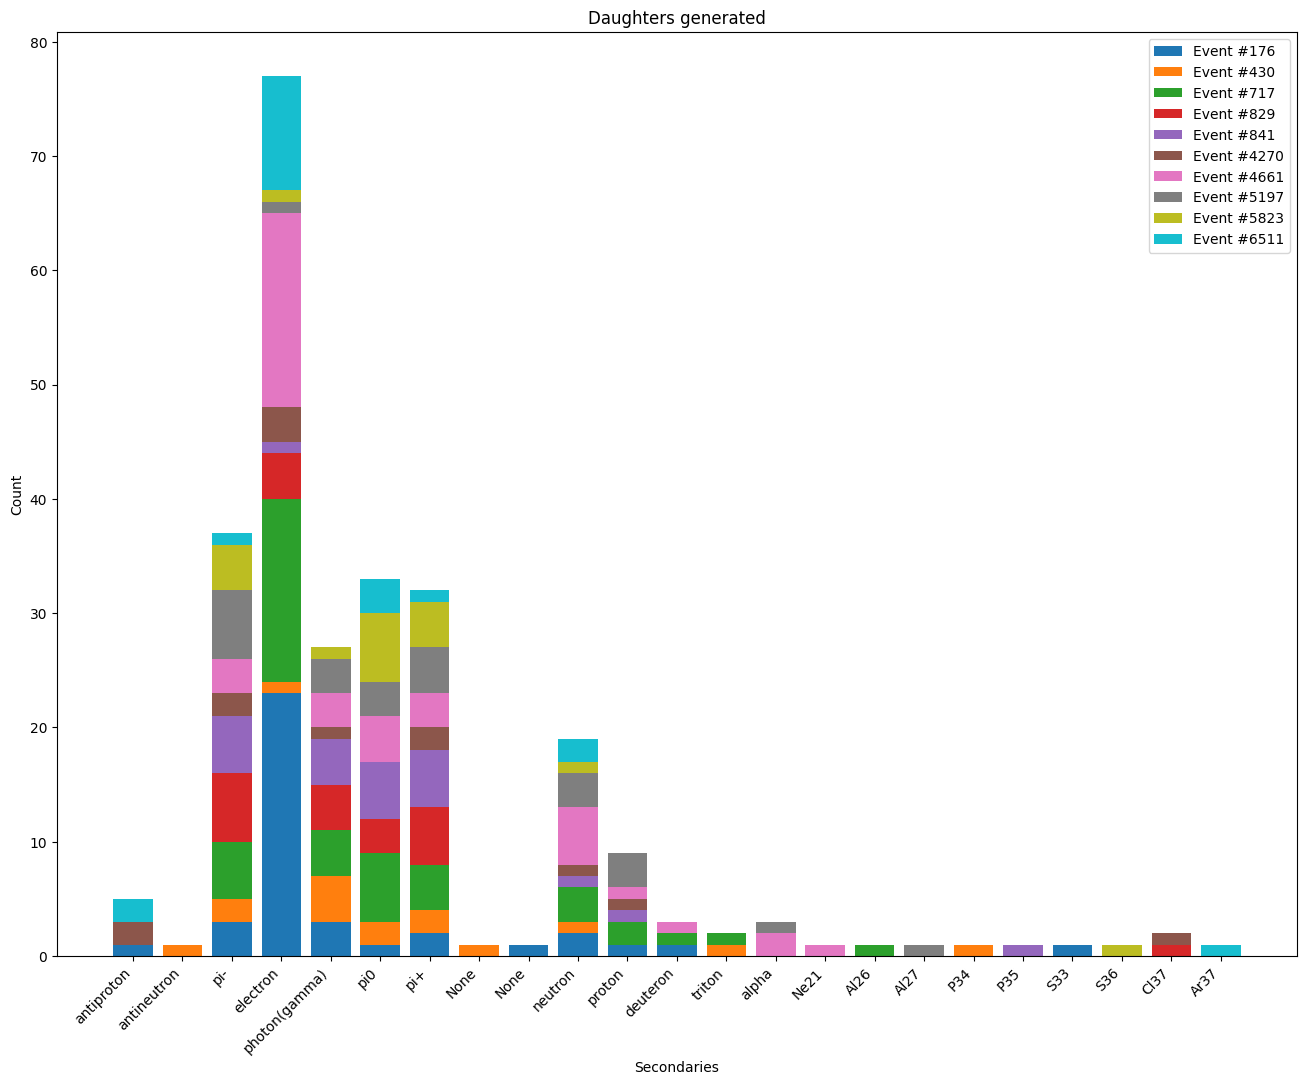

In [7]:
# This is for listing all the daughters
fig, ax = plt.subplots(figsize=(16, 12))

import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_datasets(datasets):
    # Obtain the unique elements from all datasets
    unique_elements = np.unique(np.concatenate([data[1] for data in datasets]))

    # Initialize counts for each dataset
    dataset_counts = []
    for data in datasets:
        counts = np.zeros_like(unique_elements)
        for i, elem in enumerate(unique_elements):
            counts[i] = np.count_nonzero(data[1] == elem)
        dataset_counts.append(counts)

    # Create an evenly spaced range of numbers for the x-axis
    x_values = np.arange(len(unique_elements))

    # Plot the data for each dataset
    for i, counts in enumerate(dataset_counts):
        label = 'Event #' + str(anti_He3_Result.get_value(i, 0)[0])
        if i == 0:
            plt.bar(x_values, counts, label=label)
        else:
            plt.bar(x_values, counts, bottom=np.sum(dataset_counts[:i], axis=0), label=label)

    # Apply the function to the array of particle IDs using np.vectorize()
    x_name = np.vectorize(toy_model_analysis.name_of_particle)(unique_elements)

    # Set the x-ticks and labels
    plt.xticks(x_values, x_name, rotation=45, ha='right')

    # Add labels and title
    plt.xlabel('Secondaries')
    plt.ylabel('Count')
    plt.title('Daughters generated')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


datasets = []
for i in range(10):
    datasets.append([i, anti_He3_Result.get_value(i, 1)[1]])


plot_multiple_datasets(datasets)


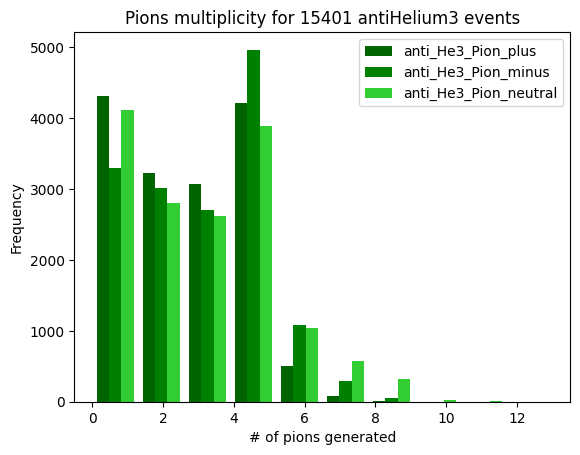

In [8]:
# This is for listing pi-/pi+/pi0 multiplicity

anti_He3_Pion_plus = []
anti_He3_Pion_minus = []
anti_He3_Pion_neutral = []
anti_He3_Pion_Charged = []

for i in range(anti_He3_Result.get_number_of_events()):
    anti_He3_Pion_plus.append(np.count_nonzero(np.array(anti_He3_Result.get_value(i, 1)[1]) == 211))
    anti_He3_Pion_minus.append(np.count_nonzero(np.array(anti_He3_Result.get_value(i, 1)[1]) == -211))
    anti_He3_Pion_neutral.append(np.count_nonzero(np.array(anti_He3_Result.get_value(i, 1)[1]) == 111))
    
anti_He3_Pion_profile = [anti_He3_Pion_plus, anti_He3_Pion_minus, anti_He3_Pion_neutral]
anti_He3_Pion_label = ['anti_He3_Pion_plus', 'anti_He3_Pion_minus', 'anti_He3_Pion_neutral']
anti_He3_Pion_color = ['darkgreen', 'green', 'limegreen']

# Count the occurrences of each value
unique_values_pi_plus, value_counts_pi_plus = np.unique(anti_He3_Pion_plus, return_counts=True)
unique_values_pi_minus, value_counts_pi_minus = np.unique(anti_He3_Pion_minus, return_counts=True)
unique_values_pi_neutral, value_counts_pi_neutral = np.unique(anti_He3_Pion_neutral, return_counts=True)
"""
# Create the bar plot
plt.bar(unique_values_pi_plus, value_counts_pi_plus, alpha=0.6, label='# of Pi+ generated')
plt.bar(unique_values_pi_minus, value_counts_pi_minus, alpha=0.6, label='# of Pi+ generated')
plt.bar(unique_values_pi_neutral, value_counts_pi_neutral, alpha=0.6, label='# of Pi0 generated')
"""
plt.figure(1)
plt.hist(anti_He3_Pion_profile, label = anti_He3_Pion_label, color=anti_He3_Pion_color)

# Add labels and title
plt.xlabel('# of pions generated')
#plt.xticks(x_values, x_name, rotation=45, ha='right')
plt.ylabel('Frequency')
plt.legend()
plt.title('Pions multiplicity for '+str(anti_He3_Result.get_number_of_events())+' antiHelium3 events')

# Show the plot
plt.show()

In [9]:
file_path_2 = '/home/jiancheng/GRAMS/toymodel_work/output/2023/anti_proton_daughters_all_1e7.dat'
label_50cm= '140cm width'

anti_He3_data_3d = []
anti_proton_data_3d = []
anti_proton_data_3d = toy_model_analysis.read_data_from_toymodel(file_path_2)
anti_proton_Result = toy_model_analysis.Analyze_daughter(anti_proton_data_3d, -2212, stop_event=True, in_flight_event=True)


Reading data...

Toy Model data imported
Found 16524 Events!
[##################################################] 100.00% 16524/16524
 We got 16524 events selected
Last event is 9999344


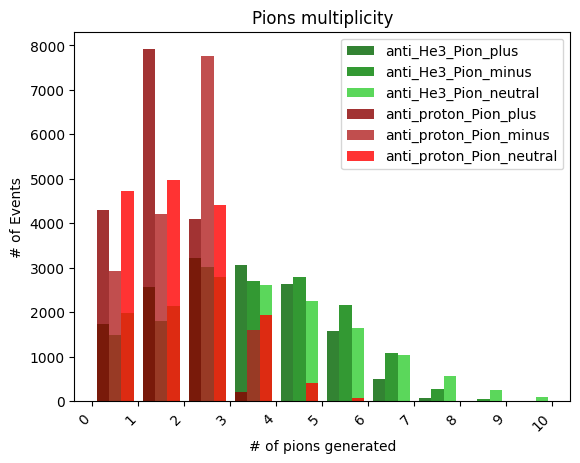

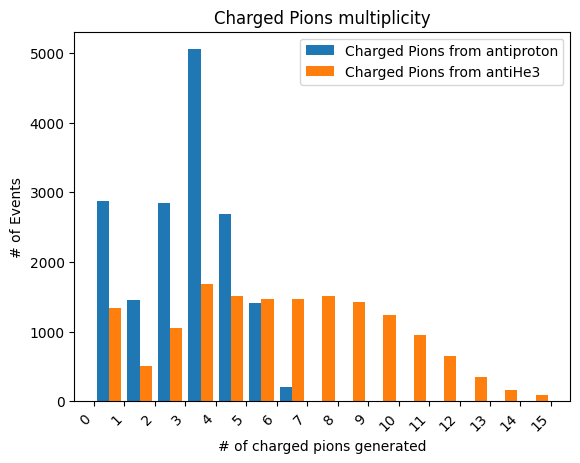

In [37]:
# This is for listing pi-/pi+/pi0 multiplicity
plt.figure(1)

anti_proton_Pion_plus = []
anti_proton_Pion_minus = []
anti_proton_Pion_neutral = []
anti_proton_Pion_Charged = []

for i in range(anti_proton_Result.get_number_of_events()):
    anti_proton_Pion_plus.append(np.count_nonzero(np.array(anti_proton_Result.get_value(i, 1)[1]) == 211))
    anti_proton_Pion_minus.append(np.count_nonzero(np.array(anti_proton_Result.get_value(i, 1)[1]) == -211))
    anti_proton_Pion_neutral.append(np.count_nonzero(np.array(anti_proton_Result.get_value(i, 1)[1]) == 111))
    
anti_proton_Pion_profile = [anti_proton_Pion_plus, anti_proton_Pion_minus, anti_proton_Pion_neutral]
anti_proton_Pion_label = ['anti_proton_Pion_plus', 'anti_proton_Pion_minus', 'anti_proton_Pion_neutral']
anti_proton_Pion_color = ['darkred', 'firebrick', 'red']

# Count the occurrences of each value
unique_values_pi_plus, value_counts_pi_plus = np.unique(anti_proton_Pion_plus, return_counts=True)
unique_values_pi_minus, value_counts_pi_minus = np.unique(anti_proton_Pion_minus, return_counts=True)
unique_values_pi_neutral, value_counts_pi_neutral = np.unique(anti_proton_Pion_neutral, return_counts=True)
"""
# Create the bar plot
plt.bar(unique_values_pi_plus, value_counts_pi_plus, alpha=0.6, label='# of Pi+ generated')
plt.bar(unique_values_pi_minus, value_counts_pi_minus, alpha=0.6, label='# of Pi+ generated')
plt.bar(unique_values_pi_neutral, value_counts_pi_neutral, alpha=0.6, label='# of Pi0 generated')
"""

plt.hist(anti_He3_Pion_profile, label = anti_He3_Pion_label, range = [0, 10], bins = 10, color=anti_He3_Pion_color, alpha=0.8)
plt.hist(anti_proton_Pion_profile, label = anti_proton_Pion_label, range = [0, 10], bins = 10, color=anti_proton_Pion_color, alpha=0.8)


# Add labels and title
plt.xlabel('# of pions generated')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], rotation=45, ha='right')
plt.ylabel('# of Events')
plt.legend()
plt.title('Pions multiplicity')

plt.figure(2)

anti_proton_Pion_Charged = np.add(anti_proton_Pion_plus, anti_proton_Pion_minus)
anti_He3_Pion_Charged = np.add(anti_He3_Pion_plus, anti_He3_Pion_minus)
#anti_He3_Pion_Charged.extend(anti_He3_Pion_minus)
Pion_Charged = [anti_proton_Pion_Charged, anti_He3_Pion_Charged]
Pion_Charged_label = ['Charged Pions from antiproton', 'Charged Pions from antiHe3']
plt.hist(Pion_Charged, range = [0, 15], bins = 15, label = Pion_Charged_label)
#print(plt.hist(Pion_Charged, label = Pion_Charged_label))
# Add labels and title
plt.xlabel('# of charged pions generated')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], rotation=45, ha='right')
plt.ylabel('# of Events')
plt.legend()
plt.title('Charged Pions multiplicity')

# Show the plot
plt.show()

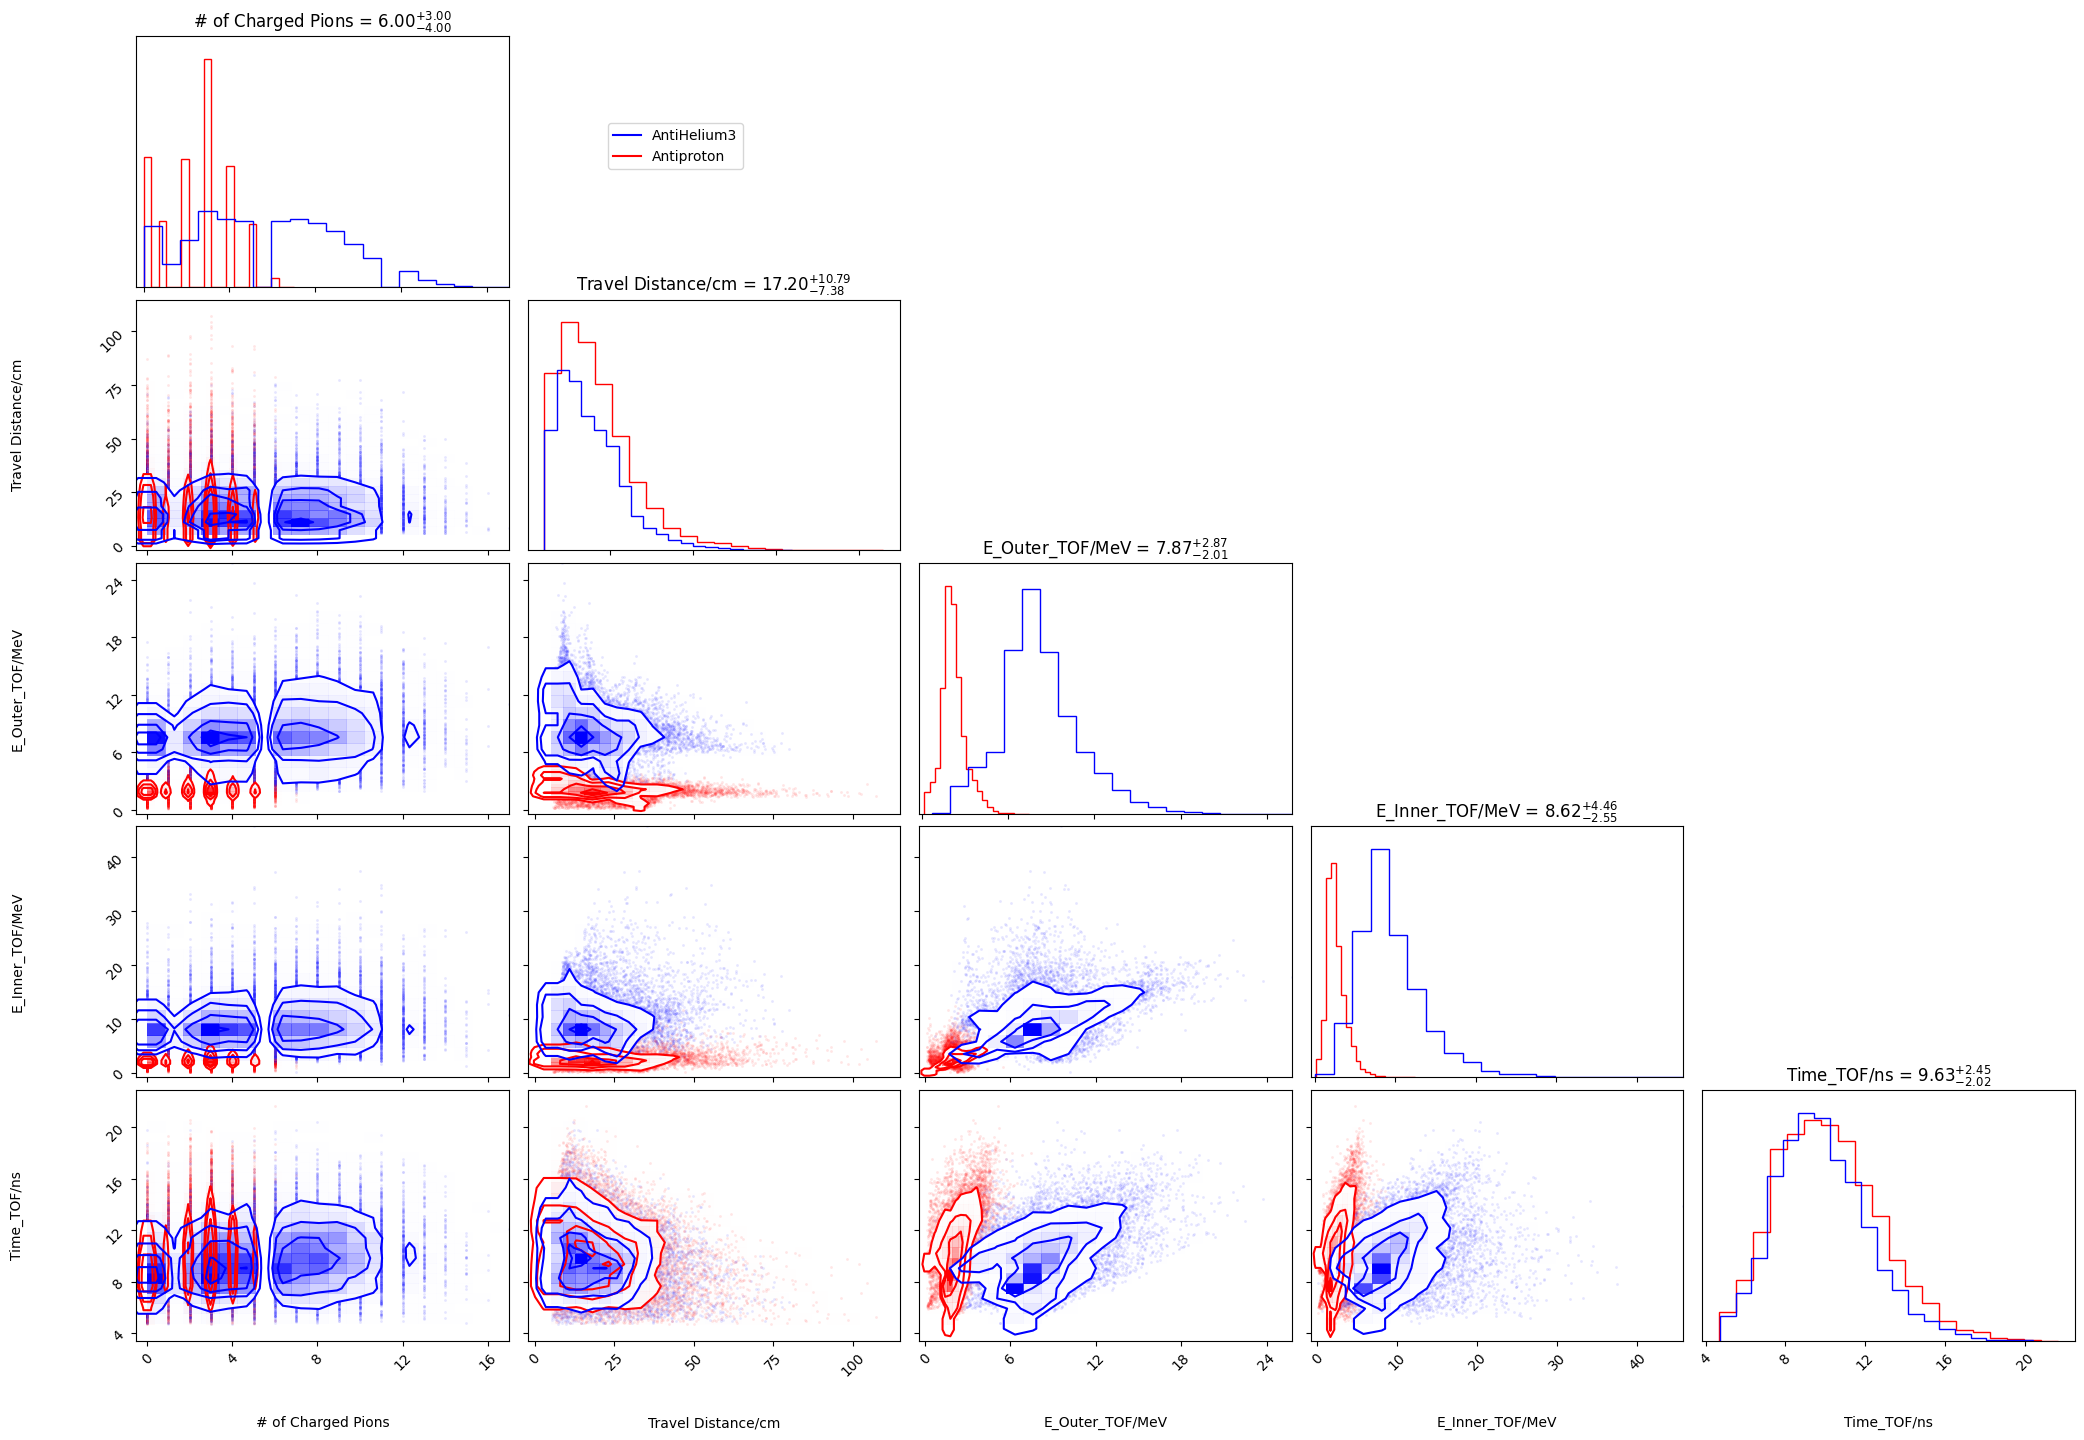

<Figure size 2200x1600 with 0 Axes>

In [50]:
# This code output corner plot of daughters

# This is for antihelium3 corner plot
anti_He3_corner_Charged_pion = []
anti_He3_corner_proton = []
anti_He3_corner_distance_traveled = []
anti_He3_corner_TOF_out_energy = []
anti_He3_corner_TOF_in_energy = []
anti_He3_corner_TOF_time = []
anti_He3_corner_label = ['# of Charged Pions', 'Travel Distance/cm', 'E_Outer_TOF/MeV', 'E_Inner_TOF/MeV', 'Time_TOF/ns']

for i in range(anti_He3_Result.get_number_of_events()):
    anti_He3_corner_Charged_pion.append(np.count_nonzero(np.logical_or(np.array(anti_He3_Result.get_value(i, 1)[1]) == 211, np.array(anti_He3_Result.get_value(i, 1)[1]) == -211)))
    anti_He3_corner_proton.append(np.count_nonzero(np.array(anti_He3_Result.get_value(i, 1)[1]) == 2212))
    anti_He3_corner_distance_traveled.append(anti_He3_Result.get_value(i, 0)[3])
    anti_He3_corner_TOF_out_energy.append(anti_He3_Result.get_value(i, 0)[4])
    anti_He3_corner_TOF_in_energy.append(anti_He3_Result.get_value(i, 0)[5])
    anti_He3_corner_TOF_time.append(anti_He3_Result.get_value(i, 0)[6])


# This is for antiproton corner plot
anti_proton_corner_Charged_pion = []
anti_proton_corner_proton = []
anti_proton_corner_distance_traveled = []
anti_proton_corner_TOF_out_energy = []
anti_proton_corner_TOF_in_energy = []
anti_proton_corner_TOF_time = []
anti_proton_corner_label = ['# of Charged Pions', 'Travel Distance/cm', 'E_Outer_TOF/MeV', 'E_Inner_TOF/MeV', 'Time_TOF/ns']

for i in range(anti_proton_Result.get_number_of_events()):
    anti_proton_corner_Charged_pion.append(np.count_nonzero(np.logical_or(np.array(anti_proton_Result.get_value(i, 1)[1]) == 211,np.array(anti_proton_Result.get_value(i, 1)[1]) == -211)))
    anti_proton_corner_proton.append(np.count_nonzero(np.array(anti_proton_Result.get_value(i, 1)[1]) == 2212))
    anti_proton_corner_distance_traveled.append(anti_proton_Result.get_value(i, 0)[3])
    anti_proton_corner_TOF_out_energy.append(anti_proton_Result.get_value(i, 0)[4])
    anti_proton_corner_TOF_in_energy.append(anti_proton_Result.get_value(i, 0)[5])
    anti_proton_corner_TOF_time.append(anti_proton_Result.get_value(i, 0)[6])
    

# Mean and standard deviation
#model A
anti_proton_mu = 2.65 + 3.65 * np.log(2)
anti_deuteron_mu = 2.65 + 3.65 * np.log(4)
anti_He3_mu = 2.65 + 3.65 * np.log(6)

anti_proton_sigma = np.sqrt(anti_proton_mu * 0.174 * math.pow(2, 0.4))
anti_deuteron_sigma = np.sqrt(anti_deuteron_mu * 0.174 * math.pow(4, 0.4))
anti_He3_sigma = np.sqrt(anti_He3_mu * 0.174 * math.pow(6, 0.4))
"""
#model B
anti_proton_mu = 2.65 + 3.65 * np.log(2)
anti_deuteron_mu = 2 * anti_proton_mu
anti_He3_mu = 3 * anti_proton_mu
anti_proton_sigma = np.sqrt(anti_proton_mu * 0.174 * math.pow(2, 0.4))
anti_deuteron_sigma = np.sqrt(2) * anti_proton_sigma
anti_He3_sigma = np.sqrt(3) * anti_proton_sigma
"""

# Generate random numbers from the Gaussian distribution
anti_proton_corner_Charged_pion_model = np.random.normal(anti_proton_mu, anti_proton_sigma, size=len(anti_proton_corner_Charged_pion))
anti_He3_corner_Charged_pion_model = np.random.normal(anti_He3_mu, anti_He3_sigma, size=len(anti_He3_corner_Charged_pion))


anti_proton_Corner_data = pd.DataFrame(anti_proton_corner_Charged_pion, columns=['Charged Pions'])
#anti_proton_Corner_data['# of protons'] = anti_proton_corner_proton
anti_proton_Corner_data['distance traveled inside LAr'] = anti_proton_corner_distance_traveled
anti_proton_Corner_data['Energy deposit in the Outer TOF'] = anti_proton_corner_TOF_out_energy
anti_proton_Corner_data['Energy deposit in the inner TOF'] = anti_proton_corner_TOF_in_energy
anti_proton_Corner_data['time differece in between TOFs'] = anti_proton_corner_TOF_time

anti_He3_Corner_data = pd.DataFrame(anti_He3_corner_Charged_pion, columns=['Charged Pions'])
#anti_He3_Corner_data['# of protons'] = anti_He3_corner_proton
anti_He3_Corner_data['distance traveled inside LAr'] = anti_He3_corner_distance_traveled
anti_He3_Corner_data['Energy deposit in the Outer TOF'] = anti_He3_corner_TOF_out_energy
anti_He3_Corner_data['Energy deposit in the inner TOF'] = anti_He3_corner_TOF_in_energy
anti_He3_Corner_data['time differece in between TOFs'] = anti_He3_corner_TOF_time    

"""
figure1 = corner.corner(anti_proton_Corner_data, color='r')
figure1 = corner.corner(anti_He3_Corner_data, color='b', labels = anti_He3_corner_label, show_titles=True, fig = figure1)

# Add a separate legend to the corner plot
legend_elements = [
    plt.Line2D([0], [0], color='blue', label='AntiHelium3'),
    plt.Line2D([0], [0], color='red', label='Antiproton'),
    # Add more legend elements as needed
]

figure1.subplots_adjust(top=0.9)
figure1.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.33, 0.85), ncol=1)
"""

#anti_proton_range = {'column1': [0, 15], 'column2': [0, 100], 'column3': [0, 24], 'column4': [0, 40], 'column5': [0, 20]}
#anti_He3_range = {'column1': [0, 15], 'column2': [0, 100], 'column3': [0, 24], 'column4': [0, 40], 'column5': [0, 20]}

# Create the first corner plot
figure1 = plt.figure(figsize=(22, 16))
corner.corner(
    anti_proton_Corner_data,
    color='r',
    labels=anti_proton_corner_label,
    show_titles=True,
    fig=figure1
)

# Create the second corner plot
figure2 = plt.figure(figsize=(22, 16))
corner.corner(
    anti_He3_Corner_data,
    color='b',
    labels=anti_He3_corner_label,
    show_titles=True,
    fig=figure1
)

# Add a separate legend to the corner plot
legend_elements = [
    plt.Line2D([0], [0], color='blue', label='AntiHelium3'),
    plt.Line2D([0], [0], color='red', label='Antiproton'),
    # Add more legend elements as needed
]

figure1.subplots_adjust(top=0.9)
figure1.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.33, 0.85), ncol=1)

plt.show()

# Save the plot to a file
figure1.savefig('ICRC_anti_He3_corner_plot.png')



0         8.31683
1         8.11841
2        10.69611
3        14.66417
4        10.59784
           ...   
15396    12.42941
15397    10.39165
15398    10.87288
15399     9.21391
15400     8.82948
Name: time differece in between TOFs, Length: 15401, dtype: float64


(array([8.480e+02, 2.876e+03, 4.080e+03, 3.965e+03, 2.678e+03, 1.294e+03,
        5.510e+02, 1.900e+02, 3.900e+01, 3.000e+00]),
 array([ 4.6781  ,  6.376212,  8.074324,  9.772436, 11.470548, 13.16866 ,
        14.866772, 16.564884, 18.262996, 19.961108, 21.65922 ]),
 <BarContainer object of 10 artists>)

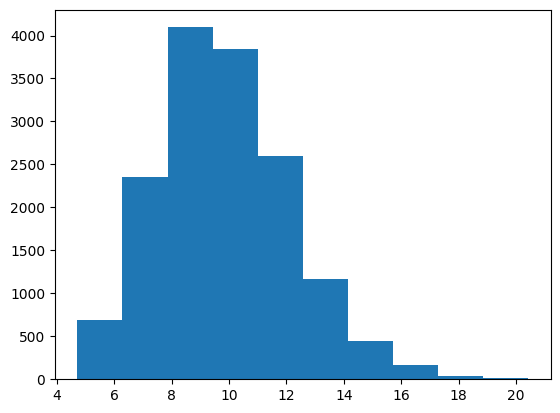

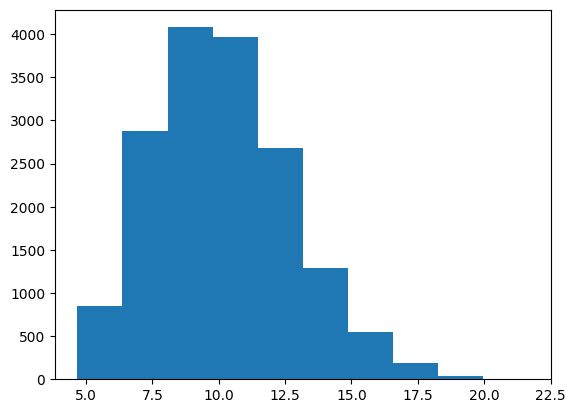

In [12]:
print(anti_He3_Corner_data['time differece in between TOFs'])
plt.figure(1)
plt.hist(anti_He3_Corner_data['time differece in between TOFs'])

plt.figure(2)
plt.hist(anti_proton_Corner_data['time differece in between TOFs'])

In [13]:
import numpy as np

# Sample arrays (replace these with your actual arrays)
array1 = np.array([1, 2])
array2 = np.array([3])
array3 = np.array([4])

# Define the desired length (number of elements) for all arrays
desired_length = 3

# Create new arrays with the desired length and fill missing elements with 0
new_array1 = np.pad(array1, (0, desired_length - len(array1)), mode='constant')
new_array2 = np.pad(array2, (0, desired_length - len(array2)), mode='constant')
new_array3 = np.pad(array3, (0, desired_length - len(array3)), mode='constant')

print(new_array1)
print(new_array2)
print(new_array3)


[1 2 0]
[3 0 0]
[4 0 0]
